In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
pd.set_option('display.max_colwidth',300)

In [2]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)
    
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, 
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d", 
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")
    
    # Create a confusion matrix with the data with normalize argument 
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap, 
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict
    
    
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [3]:
df= pd.read_csv('Data/Fake_Real_News_Data.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,"Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during a day-long tour of Washington, casting doubt on the need for the North Atlantic Treaty Organization and expressing skepticism about a muscular U.S. military presence in Asia.\n\nThe foreign policy pos...",REAL
1,1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative reform is surprising police in some cities, as they find themselves included as part of the solution.\n\nSearching for a ""framework ... [to] heal,"" Baltimore Mayor Stephanie Rawlings-Blake put in a 911 cal...",REAL
2,2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,"Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on October 27, 2016 Subscribe \nArrogance is defined as “an insulting way of thinking or behaving that comes from believing that you are better, smarter, or more important than other people.” In other words, ...",FAKE
3,3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,"Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International Golf Club in West Palm Beach, Fla. The billionaire mogul touted legalizing gambling with state Rep. Steve Crisafulli, speaker of the Florida House, and two other wired Florida Republicans, plugging hi...",REAL
4,4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under consideration to lead the department.",REAL


***Prepare the Data***

In [4]:
df['Tokenized'] = df['text'].apply(lambda x: x.split())
df.head()

,Unnamed: 0,title,text,label,Tokenized
0,0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,"Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during a day-long tour of Washington, casting doubt on the need for the North Atlantic Treaty Organization and expressing skepticism about a muscular U.S. military presence in Asia.\n\nThe foreign policy pos...",REAL,"[Donald, Trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, Monday, during, a, day-long, tour, of, Washington,, casting, doubt, on, the, need, for, the, North, Atlantic, Treaty, Organization, and, expressing, skepticism, about, a, muscular, U.S., military, presen..."
1,1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative reform is surprising police in some cities, as they find themselves included as part of the solution.\n\nSearching for a ""framework ... [to] heal,"" Baltimore Mayor Stephanie Rawlings-Blake put in a 911 cal...",REAL,"[While, some, Justice, Department, investigations, are, adversarial,, a, new, model, of, collaborative, reform, is, surprising, police, in, some, cities,, as, they, find, themselves, included, as, part, of, the, solution., Searching, for, a, ""framework, ..., [to], heal,"", Baltimore, Mayor, Steph..."
2,2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,"Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on October 27, 2016 Subscribe \nArrogance is defined as “an insulting way of thinking or behaving that comes from believing that you are better, smarter, or more important than other people.” In other words, ...",FAKE,"[Trump, Proudly, Declares:, Most, Of, The, People, I’ve, Insulted, Deserved, It, By, Andrew, Bradford, on, October, 27,, 2016, Subscribe, Arrogance, is, defined, as, “an, insulting, way, of, thinking, or, behaving, that, comes, from, believing, that, you, are, better,, smarter,, or, more, import..."
3,3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,"Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International Golf Club in West Palm Beach, Fla. The billionaire mogul touted legalizing gambling with state Rep. Steve Crisafulli, speaker of the Florida House, and two other wired Florida Republicans, plugging hi...",REAL,"[Donald, Trump, spent, a, day, in, January, 2014, hobnobbing, with, politicians, at, the, Trump, International, Golf, Club, in, West, Palm, Beach,, Fla., The, billionaire, mogul, touted, legalizing, gambling, with, state, Rep., Steve, Crisafulli,, speaker, of, the, Florida, House,, and, two, oth..."
4,4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under consideration to lead the department.",REAL,"[Notable, names, include, Ray, Washburne, (Commerce),, a, Dallas-based, investor,, is, reported, to, be, under, consideration, to, lead, the, department.]"


In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [6]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [7]:
def lemmatize(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return lemmatized_text

df['Lemmatized'] = df['text'].apply(lemmatize)
df.head()

,Unnamed: 0,title,text,label,Tokenized,Lemmatized
0,0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,"Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during a day-long tour of Washington, casting doubt on the need for the North Atlantic Treaty Organization and expressing skepticism about a muscular U.S. military presence in Asia.\n\nThe foreign policy pos...",REAL,"[Donald, Trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, Monday, during, a, day-long, tour, of, Washington,, casting, doubt, on, the, need, for, the, North, Atlantic, Treaty, Organization, and, expressing, skepticism, about, a, muscular, U.S., military, presen...","[Donald, Trump, endorse, unabashedly, noninterventionist, approach, world, affair, Monday, day, long, tour, Washington, cast, doubt, need, North, Atlantic, Treaty, Organization, express, skepticism, muscular, U.S., military, presence, Asia, \n\n, foreign, policy, position, outline, meeting, edit..."
1,1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative reform is surprising police in some cities, as they find themselves included as part of the solution.\n\nSearching for a ""framework ... [to] heal,"" Baltimore Mayor Stephanie Rawlings-Blake put in a 911 cal...",REAL,"[While, some, Justice, Department, investigations, are, adversarial,, a, new, model, of, collaborative, reform, is, surprising, police, in, some, cities,, as, they, find, themselves, included, as, part, of, the, solution., Searching, for, a, ""framework, ..., [to], heal,"", Baltimore, Mayor, Steph...","[Justice, Department, investigation, adversarial, new, model, collaborative, reform, surprising, police, city, , find, include, solution, \n\n, search, framework, heal, Baltimore, Mayor, Stephanie, Rawlings, Blake, 911, Department, Justice, ask, civil, right, investigation, Baltimore, Police, D..."
2,2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,"Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on October 27, 2016 Subscribe \nArrogance is defined as “an insulting way of thinking or behaving that comes from believing that you are better, smarter, or more important than other people.” In other words, ...",FAKE,"[Trump, Proudly, Declares:, Most, Of, The, People, I’ve, Insulted, Deserved, It, By, Andrew, Bradford, on, October, 27,, 2016, Subscribe, Arrogance, is, defined, as, “an, insulting, way, of, thinking, or, behaving, that, comes, from, believing, that, you, are, better,, smarter,, or, more, import...","[Trump, Proudly, declare, People, insult, Deserved, Andrew, Bradford, October, 27, 2016, Subscribe, \n, Arrogance, define, insulting, way, thinking, behave, come, believe, well, smart, important, people, word, Donald, Trump, perfectly, exemplify, arrogance, prove, fact, \n, appear, Good, Morning..."
3,3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,"Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International Golf Club in West Palm Beach, Fla. The billionaire mogul touted legalizing gambling with state Rep. Steve Crisafulli, speaker of the Florida House, and two other wired Florida Republicans, plugging hi...",REAL,"[Donald, Trump, spent, a, day, in, January, 2014, hobnobbing, with, politicians, at, the, Trump, International, Golf, Club, in, West, Palm, Beach,, Fla., The, billionaire, mogul, touted, legalizing, gambling, with, state, Rep., Steve, Crisafulli,, speaker, of, the, Florida, House,, and, two, oth...","[Donald, Trump, spend, day, January, 2014, hobnob, politician, Trump, International, Golf, Club, West, Palm, Beach, Fla., billionaire, mogul, tout, legalize, gambling, state, Rep., Steve, Crisafulli, speaker, Florida, House, wire, Florida, Republicans, plug, property, potential, site, casino,

In [8]:
def join_lemmatized_text(tokens):
    return ' '.join(tokens)

In [9]:
df['Joined'] = df['Lemmatized'].apply(join_lemmatized_text)
df.head()

,Unnamed: 0,title,text,label,Tokenized,Lemmatized,Joined
0,0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,"Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during a day-long tour of Washington, casting doubt on the need for the North Atlantic Treaty Organization and expressing skepticism about a muscular U.S. military presence in Asia.\n\nThe foreign policy pos...",REAL,"[Donald, Trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, Monday, during, a, day-long, tour, of, Washington,, casting, doubt, on, the, need, for, the, North, Atlantic, Treaty, Organization, and, expressing, skepticism, about, a, muscular, U.S., military, presen...","[Donald, Trump, endorse, unabashedly, noninterventionist, approach, world, affair, Monday, day, long, tour, Washington, cast, doubt, need, North, Atlantic, Treaty, Organization, express, skepticism, muscular, U.S., military, presence, Asia, \n\n, foreign, policy, position, outline, meeting, edit...",Donald Trump endorse unabashedly noninterventionist approach world affair Monday day long tour Washington cast doubt need North Atlantic Treaty Organization express skepticism muscular U.S. military presence Asia \n\n foreign policy position outline meeting editorial board Washington Post come d...
1,1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative reform is surprising police in some cities, as they find themselves included as part of the solution.\n\nSearching for a ""framework ... [to] heal,"" Baltimore Mayor Stephanie Rawlings-Blake put in a 911 cal...",REAL,"[While, some, Justice, Department, investigations, are, adversarial,, a, new, model, of, collaborative, reform, is, surprising, police, in, some, cities,, as, they, find, themselves, included, as, part, of, the, solution., Searching, for, a, ""framework, ..., [to], heal,"", Baltimore, Mayor, Steph...","[Justice, Department, investigation, adversarial, new, model, collaborative, reform, surprising, police, city, , find, include, solution, \n\n, search, framework, heal, Baltimore, Mayor, Stephanie, Rawlings, Blake, 911, Department, Justice, ask, civil, right, investigation, Baltimore, Police, D...",Justice Department investigation adversarial new model collaborative reform surprising police city find include solution \n\n search framework heal Baltimore Mayor Stephanie Rawlings Blake 911 Department Justice ask civil right investigation Baltimore Police Department beat cop tactic \n\n wee...
2,2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,"Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on October 27, 2016 Subscribe \nArrogance is defined as “an insulting way of thinking or behaving that comes from believing that you are better, smarter, or more important than other people.” In other words, ...",FAKE,"[Trump, Proudly, Declares:, Most, Of, The, People, I’ve, Insulted, Deserved, It, By, Andrew, Bradford, on, October, 27,, 2016, Subscribe, Arrogance, is, defined, as, “an, insulting, way, of, thinking, or, behaving, that, comes, from, believing, that, you, are, better,, smarter,, or, more, import...","[Trump, Proudly, declare, People, insult, Deserved, Andrew, Bradford, October, 27, 2016, Subscribe, \n, Arrogance, define, insulting, way, thinking, behave, come, believe, well, smart, important, people, word, Donald, Trump, perfectly, exemplify, arrogance, prove, fact, \n, appear, Good, Morning...",Trump Proudly declare People insult Deserved Andrew Bradford October 27 2016 Subscribe \n Arrogance define insulting way thinking behave come believe well smart important people word Donald Trump perfectly exemplify arrogance prove fact \n appear Good Morning America Thursday morning GOP nominee...
3,3,Inside the Trump-Bush melodrama: Decades of tension and discomfor

***Analyze Class Balance***

In [10]:
# Class balance
class_balance = df['label'].value_counts()
num_real_articles = class_balance['REAL']
num_fake_articles = class_balance['FAKE']

print("Class Balance:")
print("Number of Real Articles:", num_real_articles)
print("Number of Fake Articles:", num_fake_articles)

Class Balance:
Number of Real Articles: 3171
Number of Fake Articles: 3164


In [11]:
# Average word count
df['Word_Count'] = df['Tokenized'].apply(len)
average_word_count_real = df[df['label'] == 'REAL']['Word_Count'].mean()
average_word_count_fake = df[df['label'] == 'FAKE']['Word_Count'].mean()

print("\nAverage Word Count:")
print("Real News Articles:", average_word_count_real)
print("Fake News Articles:", average_word_count_fake)


Average Word Count:
Real News Articles: 873.2576474298329
Fake News Articles: 679.1292667509482


***Compare Word Frequencies***

In [12]:
# Create filters for 1 and 5 star reviews
filter_real = df['label'] == 'REAL'
filter_fake = df['label'] == 'FAKE'
filter_real.sum(), filter_fake.sum()

(3171, 3164)

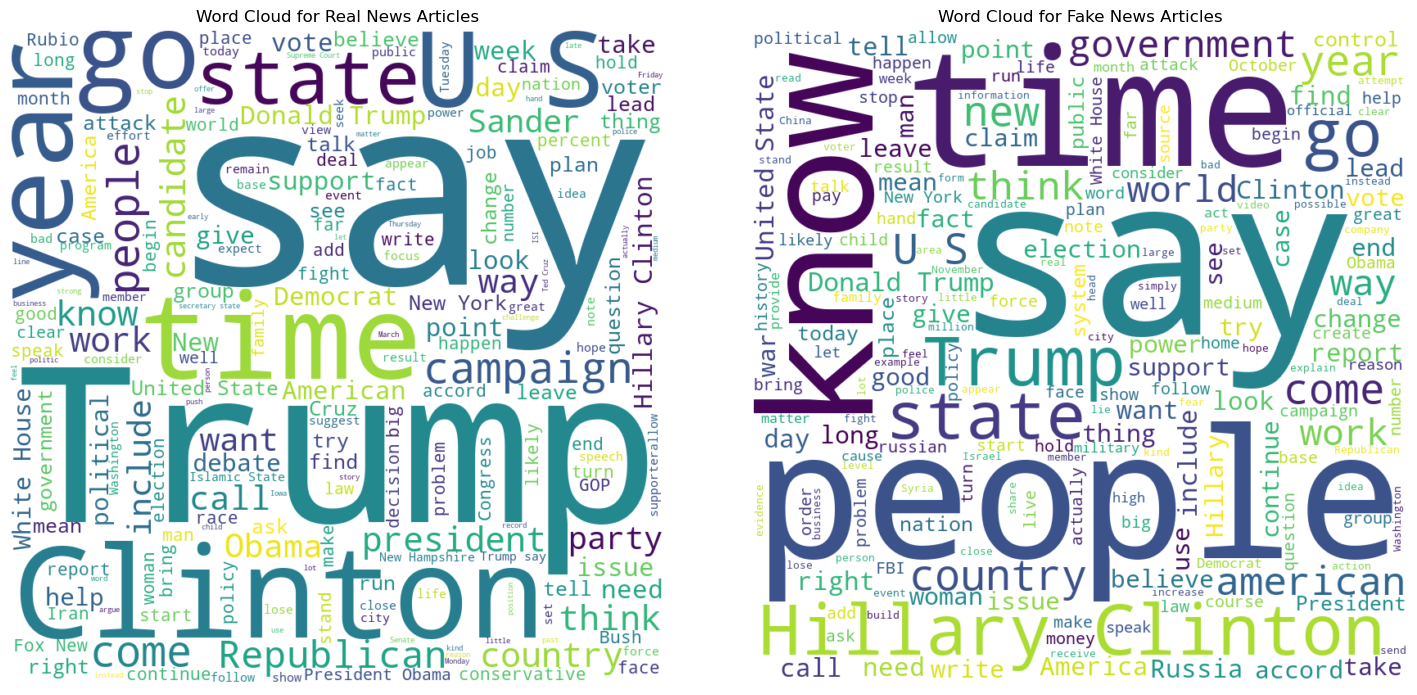

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create filters for real and fake news articles
filter_real = df['label'] == 'REAL'
filter_fake = df['label'] == 'FAKE'

# Create word clouds for real and fake news articles
real_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df[filter_real]['Joined']))
fake_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df[filter_fake]['Joined']))

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(real_cloud, interpolation='bilinear')
axes[0].set_title('Word Cloud for Real News Articles')
axes[0].axis('off')

axes[1].imshow(fake_cloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for Fake News Articles')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

In [15]:
X = df['Joined']
y = df['label']

In [16]:
# Train test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=321)

In [17]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
X_train, y_train = sampler.fit_resample(X_train_full.values.reshape(-1,1),y_train_full)
X_train = X_train.flatten()

In [18]:
# instantiate a vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)

CountVectorizer()

In [19]:
# Transform train and test data 
X_train_counts = count_vectorizer.transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      2373
        REAL       1.00      1.00      1.00      2373

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



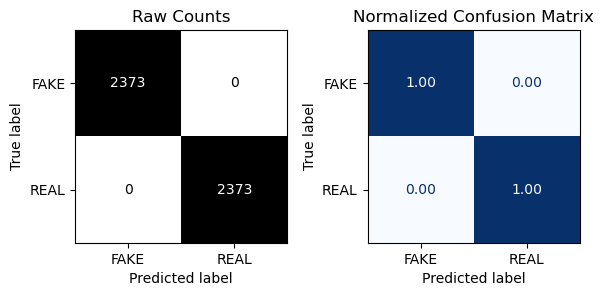


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        FAKE       0.89      0.91      0.90       786
        REAL       0.91      0.89      0.90       798

    accuracy                           0.90      1584
   macro avg       0.90      0.90      0.90      1584
weighted avg       0.90      0.90      0.90      1584



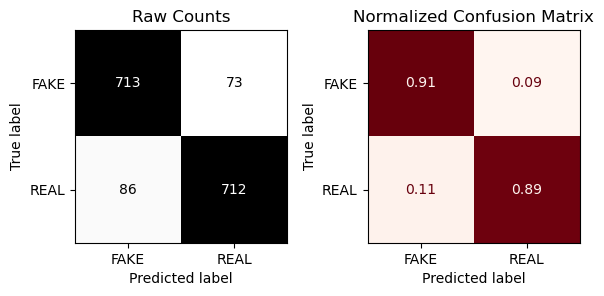

In [20]:
# Instantitate a Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_counts, y_train)
# Obtain evaluation metrics
evaluate_classification(clf, X_train_counts, y_train, X_test_counts, y_test)

In [21]:
# Create a pipeline with a vectorizer and classification model.
clf_pipe = Pipeline([('vectorizer', CountVectorizer(stop_words='english')),
                     ('clf',RandomForestClassifier(random_state=42))])
clf_pipe

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      2373
        REAL       1.00      1.00      1.00      2373

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



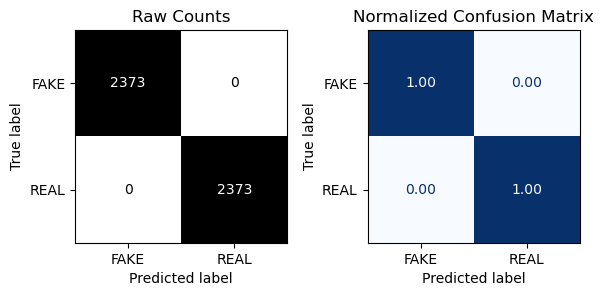


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       786
        REAL       0.91      0.90      0.90       798

    accuracy                           0.90      1584
   macro avg       0.90      0.90      0.90      1584
weighted avg       0.90      0.90      0.90      1584



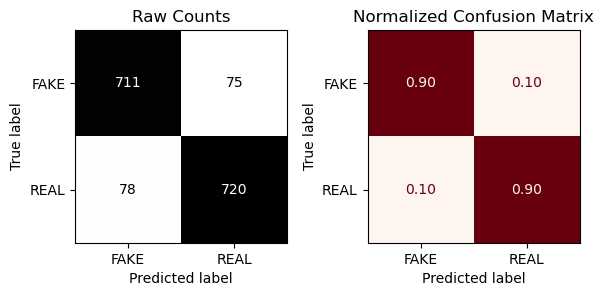

In [22]:
# Fit the model pipeline
clf_pipe.fit(X_train, y_train)
# Evaluate
evaluate_classification(clf_pipe, X_train,y_train, X_test, y_test)

In [25]:
# Define param grid
params = {
    'vectorizer__stop_words': ['english'],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    # other parameters for RandomForestClassifier
}

In [26]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV
grid_search = GridSearchCV(clf_pipe, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

print("Best combo:")
print(grid_search.best_params_)

Best combo:
{'clf__max_depth': None, 'clf__n_estimators': 300, 'vectorizer__stop_words': 'english'}
